In [89]:
import pandas as pd
import os
import matplotlib.pyplot as plt

yeardata_csv = os.path.join('new_dataset_clipped.csv')
attributes_csv = os.path.join('FIFA_attributes.csv')
yeardata_df = pd.read_csv(yeardata_csv, encoding = "utf-8")
attributes_df = pd.read_csv(attributes_csv, encoding='ISO-8859-1')
placements_csv = os.path.join('World_cup_placements.csv')
placements_df = pd.read_csv(placements_csv)

In [60]:
yeardata_df.head()

,Unnamed: 0,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games
0,133,Scotland,2005,2,3,4,11,8,9
1,280,England,2005,7,3,1,19,11,11
2,427,Wales,2005,5,3,1,7,8,9
3,574,Northern Ireland,2005,5,3,2,8,17,10
4,721,USA,2005,11,5,4,33,12,20


In [61]:
attributes_df.head()

,Year,Name,ATT,MID,DEF,OVR
0,2018,Spain,84,86,86,86
1,2018,Brazil,86,83,85,85
2,2018,Germany,81,85,84,85
3,2018,Belgium,86,84,85,84
4,2018,France,83,86,81,84


In [62]:
attributes_df.rename(columns={"Name":"Country"},inplace=True)

In [63]:
attributes_df.head()

,Year,Country,ATT,MID,DEF,OVR
0,2018,Spain,84,86,86,86
1,2018,Brazil,86,83,85,85
2,2018,Germany,81,85,84,85
3,2018,Belgium,86,84,85,84
4,2018,France,83,86,81,84


In [64]:
total_info_df = pd.merge(yeardata_df, attributes_df, on=('Country', 'Year'))
total_info_df.head()

,Unnamed: 0,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,ATT,MID,DEF,OVR
0,133,Scotland,2005,2,3,4,11,8,9,73,76,78,77
1,280,England,2005,7,3,1,19,11,11,89,88,88,88
2,427,Wales,2005,5,3,1,7,8,9,82,80,67,75
3,574,Northern Ireland,2005,5,3,2,8,17,10,65,67,67,68
4,868,Uruguay,2005,6,0,5,9,11,11,82,75,75,76


In [65]:
total_info_df_drop = total_info_df[["Country", "Year", "Wins", "Losses", "Draws", "Points_Scored",
                                  "Points_Against", "Ttl_Games", "ATT", "MID", "DEF","OVR"]]
total_info_df_drop.head()

,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,ATT,MID,DEF,OVR
0,Scotland,2005,2,3,4,11,8,9,73,76,78,77
1,England,2005,7,3,1,19,11,11,89,88,88,88
2,Wales,2005,5,3,1,7,8,9,82,80,67,75
3,Northern Ireland,2005,5,3,2,8,17,10,65,67,67,68
4,Uruguay,2005,6,0,5,9,11,11,82,75,75,76


In [66]:
total_info_df_drop.reset_index().head()

,index,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,ATT,MID,DEF,OVR
0,0,Scotland,2005,2,3,4,11,8,9,73,76,78,77
1,1,England,2005,7,3,1,19,11,11,89,88,88,88
2,2,Wales,2005,5,3,1,7,8,9,82,80,67,75
3,3,Northern Ireland,2005,5,3,2,8,17,10,65,67,67,68
4,4,Uruguay,2005,6,0,5,9,11,11,82,75,75,76


passing_math_df = pd.DataFrame(total_info_df['math_score']>70).rename(columns={'math_score':'passing_math'})
passing_math_df = passing_math_df.reset_index().rename(columns={'index':'Student ID'})

In [67]:
placements_merge = pd.merge(total_info_df_drop, placements_df, on = ("Year", "Country"), how='outer')

In [69]:
placements_merge['Win_Percent'] = placements_merge['Wins']/placements_merge['Ttl_Games']
placements_merge = placements_merge[['Country','Year','Wins','Losses','Draws','Points_Scored',
                                     'Points_Against','Ttl_Games','Win_Percent',
                                     'ATT','MID','DEF','OVR','Placement']]

In [79]:
placements_merge = placements_merge.round(2)
placements_merge.head()

,Country,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,DEF,OVR,Placement
0,Scotland,2005,2,3,4,11,8,9,0.22,73,76,78,77,0.0
1,England,2005,7,3,1,19,11,11,0.64,89,88,88,88,0.0
2,Wales,2005,5,3,1,7,8,9,0.56,82,80,67,75,0.0
3,Northern Ireland,2005,5,3,2,8,17,10,0.50,65,67,67,68,0.0
4,Uruguay,2005,6,0,5,9,11,11,0.55,82,75,75,76,0.0


In [80]:
placements_merge = placements_merge.fillna(0)

In [81]:
placements_merge.to_csv("FIFA_placements_merge.csv")

## Multiple Regression

In [82]:
# Use Pandas get_dummies to convert categorical data

placements_merge2 = pd.get_dummies(placements_merge)
placements_merge2.head()

,Year,Wins,Losses,Draws,Points_Scored,Points_Against,Ttl_Games,Win_Percent,ATT,MID,...,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Tunisia,Country_Turkey,Country_Ukraine,Country_Uruguay,Country_Venezuela,Country_Wales
0,2005,2,3,4,11,8,9,0.22,73,76,...,0,0,0,0,0,0,0,0,0,0
1,2005,7,3,1,19,11,11,0.64,89,88,...,0,0,0,0,0,0,0,0,0,0
2,2005,5,3,1,7,8,9,0.56,82,80,...,0,0,0,0,0,0,0,0,0,1
3,2005,5,3,2,8,17,10,0.50,65,67,...,0,0,0,0,0,0,0,0,0,0
4,2005,6,0,5,9,11,11,0.55,82,75,...,0,0,0,0,0,0,0,1,0,0


In [92]:
# Assign X (data) and y (target)

# X = placements_merge2[["Win_Percent","Points_Scored","ATT","MID","DEF","OVR"]]
# y = placements_merge2["Placement"].values.reshape(-1, 1)
X = placements_merge2[["ATT","MID","DEF","OVR"]]
y = placements_merge2["Win_Percent"].values.reshape(-1, 1)
print(X.shape, y.shape)

(574, 4) (574, 1)


In [93]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [94]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [95]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [96]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

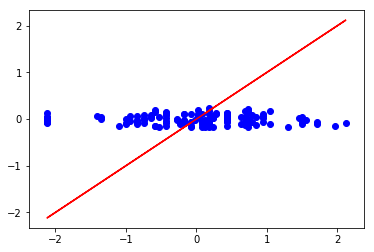

In [97]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
plt.plot(y_test_scaled, y_test_scaled, c='red')
plt.scatter(y_test_scaled, predictions, c='blue')
plt.show()

In [98]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.001970467233175, R2: -0.018772796542592785
